The idea of time series filtering is that we want to separate out signal from noise or multiple different features of a signal based on the assumption that those components are separable in the frequency domain.

In order to do filtering we use Filtering Kernel which is something that slides along the time series data and produces our filtered signal. It is aligned with the data and we do element-wise multiplication, sum and get a single data at a point which becomes the data point at a certein point.

## Generate Signal With Random Noise 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy import signal

In [2]:
srate = 1000
time = np.arange(10*srate)/srate # time vector in indeces
npnts = len(time)

# create the signal
data = np.random.randn(npnts)*5

# Add 50Hz linepoint
data += np.sin(2*np.pi*50*time)

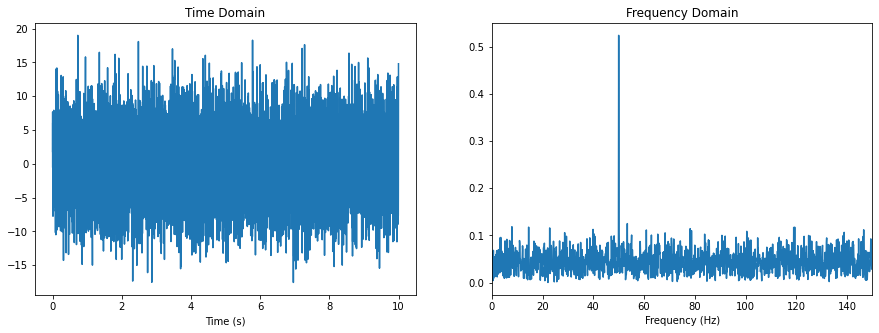

In [3]:
def plotSignal(data):
    
    # Create a figure
    fig,ax = plt.subplots(1,2, figsize = (15,5))
    
    # Plot the Time domain
    ax[0].plot(time, data)
    ax[0].set_xlabel("Time (s)")
    ax[0].set_title("Time Domain")
    
    # Plot frequency-domain signal
    dataX = np.abs(scipy.fftpack.fft(data/npnts)) # normalization
    hz = np.linspace(0,srate/2, int(npnts/2) + 1)
    ax[1].plot(hz, dataX[:len(hz)])
    ax[1].set_xlim([0,150])
    ax[1].set_xlabel("Frequency (Hz)")
    ax[1].set_title("Frequency Domain")
    
plotSignal(data)

## Notch Out Line Noise

We will remove the noise artifact we added to the simulated daatset using IIR notch filter from scipy'a signal library.

In [4]:
# Generate the Kernel
f0 = 50 # frequency to be notched out
Q = 50 # Quality of the filter

# Design the notch filter
b,a = signal.iirnotch(f0, Q, srate)

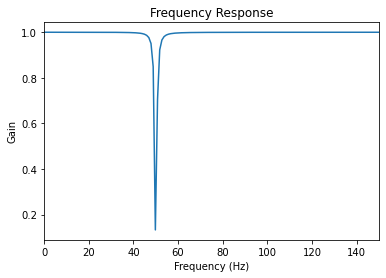

In [5]:
# Evaluate the filter
freq,h = signal.freqz(b,a,fs = srate)

plt.plot(freq, np.abs(h)**2)
plt.title("Frequency Response")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain")
plt.xlim([0,150])
plt.show()

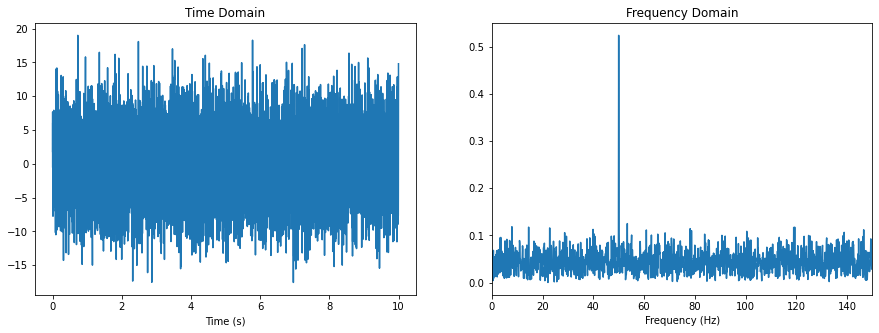

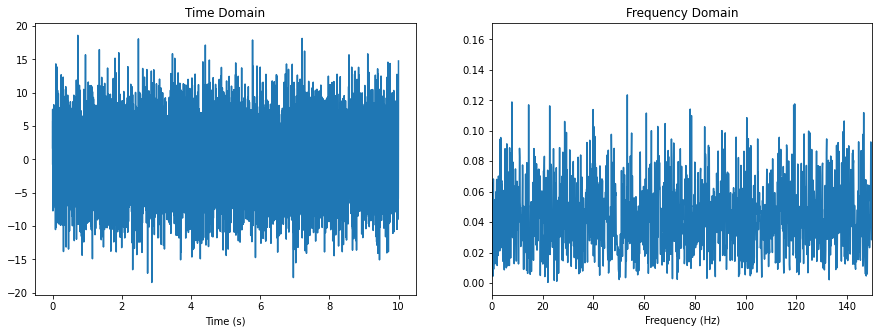

In [6]:
notched = signal.filtfilt(b,a,data)

plotSignal(data)
plotSignal(notched)

In [7]:
def plot2Signals(data1, data2):
    
    # Create a figure
    fig,ax = plt.subplots(1,2, figsize = (15,5))
    
    # Plot the Time domain
    ax[0].plot(time, data1, label = "Original")
    ax[0].plot(time, data2, label = "Filtered")
    ax[0].legend()
    ax[0].set_xlabel("Time (s)")
    ax[0].set_title("Time Domain")
    
    # Plot frequency-domain signal
    data1X = np.abs(scipy.fftpack.fft(data1/npnts)) # normalization
    data2X = np.abs(scipy.fftpack.fft(data2/npnts)) # normalization
    hz = np.linspace(0,srate/2, int(npnts/2) + 1)
    ax[1].plot(hz, data1X[:len(hz)], label = "Original")
    ax[1].plot(hz, data2X[:len(hz)], label = "Original")
    ax[1].set_xlim([0,150])
    ax[1].legend()
    ax[1].set_xlabel("Frequency (Hz)")
    ax[1].set_title("Frequency Domain")

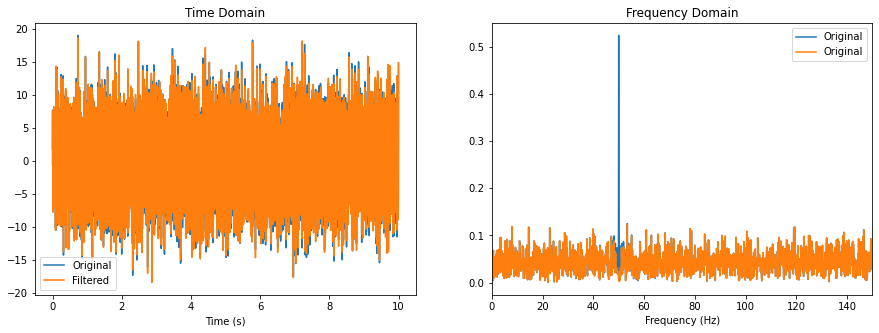

In [8]:
plot2Signals(data, notched)

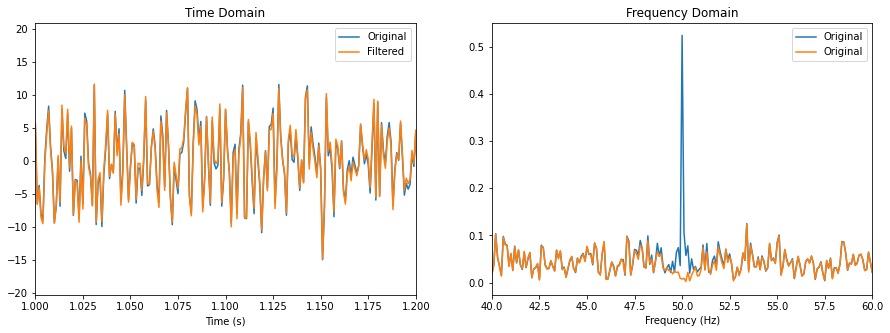

In [9]:
# define for 0.2 seconds only
def plot2Signals2(data1, data2):
    
    # Create a figure
    fig,ax = plt.subplots(1,2, figsize = (15,5))
    
    # Plot the Time domain
    ax[0].plot(time, data1, label = "Original")
    ax[0].plot(time, data2, label = "Filtered")
    ax[0].legend()
    ax[0].set_xlim(1,1.2)
    ax[0].set_xlabel("Time (s)")
    ax[0].set_title("Time Domain")
    
    # Plot frequency-domain signal
    data1X = np.abs(scipy.fftpack.fft(data1/npnts)) # normalization
    data2X = np.abs(scipy.fftpack.fft(data2/npnts)) # normalization
    hz = np.linspace(0,srate/2, int(npnts/2) + 1)
    ax[1].plot(hz, data1X[:len(hz)], label = "Original")
    ax[1].plot(hz, data2X[:len(hz)], label = "Original")
    ax[1].set_xlim([40,60])
    ax[1].legend()
    ax[1].set_xlabel("Frequency (Hz)")
    ax[1].set_title("Frequency Domain")
plot2Signals2(data, notched)

## High-Pass FIR Filter 

We need to specify two important parameters for FIR filter: The filter cut-off, and the order of filter (number of time points in the filter kernel). We will apply this filter to the noched filter results obtained above.

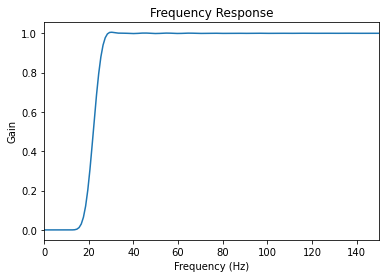

In [10]:
lowedge = 20 # hz
fkern = signal.firwin(lowedge*10 +1, lowedge, 
                      fs = srate, pass_zero = False)

# Evaluate the filter
freq,h = signal.freqz(fkern,1,fs = srate) # set a as 1

plt.plot(freq, np.abs(h)**2)
plt.title("Frequency Response")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain")
plt.xlim([0,150])
plt.show()

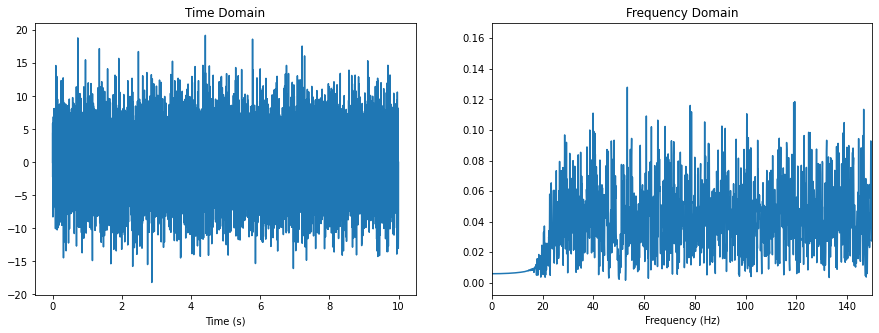

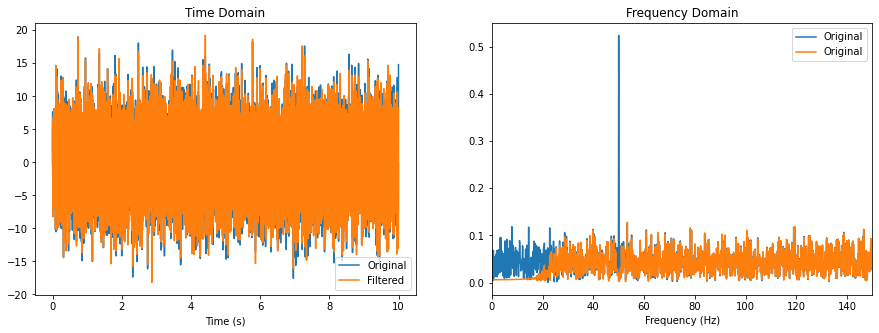

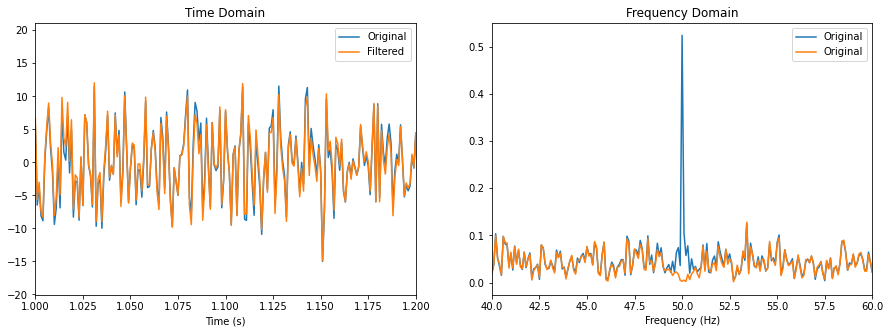

In [11]:
highpass = signal.filtfilt(fkern,1,notched)

plotSignal(highpass)
plot2Signals(data, highpass)
plot2Signals2(data, highpass)

## Low-Pass IIR (Butterworth) Filter

An important point in low-pass IIR filter is that you need to specify the order (the number ot taps), or the length of filter kernel. These filters have small filter order

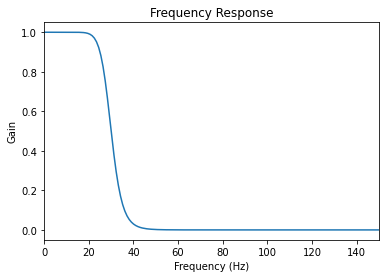

In [12]:
lowcutoff = 30
# Evaluate the filter
b,a = signal.butter(6,lowcutoff/(srate/2))
# Evaluate the filter
freq,h = signal.freqz(b,a,fs = srate)
plt.plot(freq, np.abs(h)**2)
plt.title("Frequency Response")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain")
plt.xlim([0,150])
plt.show()

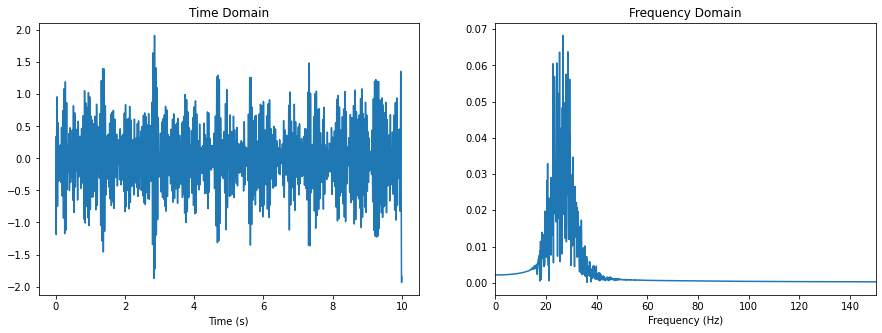

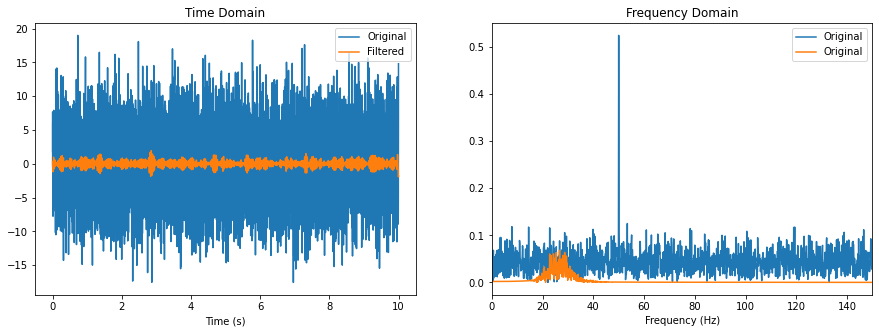

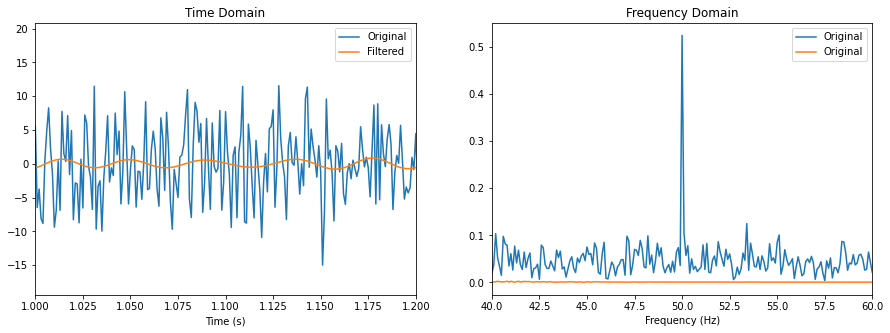

In [13]:
bandpass = signal.filtfilt(b,a,highpass)

plotSignal(bandpass)
plot2Signals(data, bandpass)
plot2Signals2(data, bandpass)

## Bonus: Desert Landscape

In [14]:
centerfreqs = np.linspace(6,15,10)
filtdata = np.zeros((10,npnts))
r = 0
for i in centerfreqs:
    
    # Design a filter kernel
    fwin = [i-2,i+2]
    b = signal.firwin(2001, fwin, pass_zero = False, fs = srate)
    
    # Apply the kernel to the data to filter them and store in matrix
    filtdata[r,:] = signal.filtfilt(b,1,data)
    r += 1

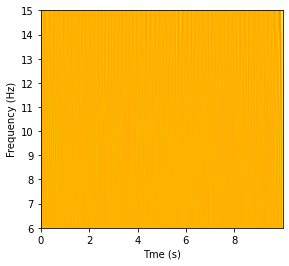

In [15]:
plt.imshow(filtdata, 
           extent = [time[0], time[-1], centerfreqs[0], centerfreqs[-1]], 
           origin = "upper", cmap = "Wistia")
plt.xlabel("Tme (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

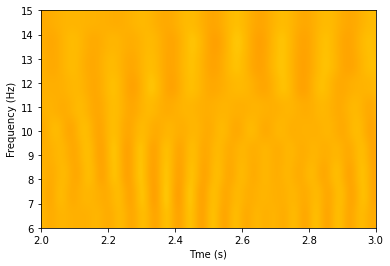

In [16]:
plt.imshow(filtdata, 
           extent = [time[0], time[-1], centerfreqs[0], centerfreqs[-1]], 
           origin = "upper", cmap = "Wistia", aspect = "auto")
plt.xlabel("Tme (s)")
plt.ylabel("Frequency (Hz)")
plt.xlim([2,3])
plt.show()